In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

# Linear Regression

Linear regression is a classic method of fitting a line to a set of data. It can be extended to fitting any curve with linear coefficients.

## Basic Algebra

A line can be defined using this standard equation:

$$y = a x + b$$

Where $a$ is the slope and $b$ is the y-intercept. Given two sets of points $x_1, y_1$ and $x_2, y_2$, we have two equations with two unknowns. It is then possible to solve for $a$ and $b$ explicitly.

For example, given the points 2, 1 and 3, 3, we can visualize these points:

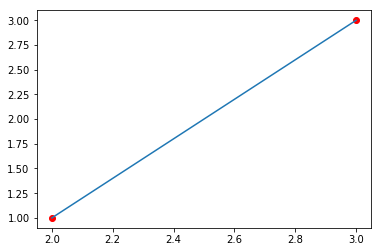

In [2]:
(x1, y1) = (2, 1)
(x2, y2) = (3, 3)

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot([x1, x2], [y1, y2])
plt.show()

To solve for constants $a$ and $b$, we can write these two equations:

$$1 = 2 a + b$$

$$3 = 3 a + b$$

Using basic algebra, we find the values for $a$ and $b$ are:

$$a = 2$$

$$b = -3$$

Redrawing the graph with the y-intercept:

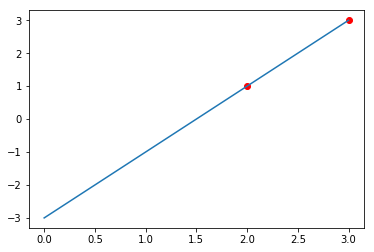

In [3]:
a = 2
b = -3

plt.plot(x1, y1, 'ro')
plt.plot(x2, y2, 'ro')
plt.plot([0, x2], [b, y2])
plt.show()

## Linear Algebra

The problem above can be abstracted using [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra). The system of equations above can be rewritten in matrix form:

$$1 = 2 a + b$$

$$3 = 3 a + b$$

$$ \begin{bmatrix}
1 \\
3
\end{bmatrix} = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

This can be written more generally as matrix equation

$$y = A v$$

Where $y$ and $v$ are vectors and $A$ is a matrix:

$$y = \begin{bmatrix}
1 \\
3
\end{bmatrix}$$

$$v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

$$A = \begin{bmatrix}
2 & 1 \\
3 & 1 \\
\end{bmatrix}$$

To solve for $a$ and $b$, which is equivalent to solving for the vector $v$, consider how we would solve a simple equation such as

$$1 = 2 x$$

We could multiply both sides of the equation by the inverse of $2$, which is $2^{-1}$

$$2^{-1} \times 1 = 2^{-1} \times 2 x$$

$2 \times 2^{-1}$ is just $1$, so

$$x = \frac{1}{2}$$

By analogy, multiplying the matrix equation above by the inverse of $A$ or $A^{-1}$ on both sides would look like this

$$y = A v$$

$$A^{-1} y = A^{-1} A v$$

The quantity $A^{-1} A$ becomes the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix), so the vector $v$ would then be

$$v = A^{-1} y$$

NumPy contains methods to compute the inverse of a matrix.

In [4]:
# Create a 2x2 matrix

A = np.array([[x1, 1], [x2, 1]])
A

array([[2, 1],
       [3, 1]])

In [5]:
# Compute the inverse of A

Ainv = np.linalg.inv(A)
Ainv

array([[-1.,  1.],
       [ 3., -2.]])

In [6]:
# Multiply the inverse of A with A to confirm it produces the identity matrix

Ainv.dot(A)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

This is the value of the identity matrix with a very small round-off error:

$$A^{-1} A = I = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

Multiplying the vector $v$ with $A^{-1}$ on the left yields the vector $y$:

In [7]:
y = np.array([1, 3])
v = Ainv.dot(y)
v

array([ 2., -3.])

Which is the same result as before with basic algebra.

## More Data

Consider the case when more than two data points are available.

Given a set of samples, $x_1, x_2, ... x_n$ and $y_1, y_2, ... y_n$, a simple linear model can be written as:

$$ y_i = a x_i + b$$

This can be rewritten in matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Introduce variables for simplification:

$$ y = \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix}$$

$$ A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix}$$

Substitute variables above to produce a simplifed form:

$$ y = A v$$

If $A$ is a square matrix, i.e. $n = 2$, $a$ and $b$ can be determined exactly:

$$ \begin{bmatrix}
a \\
b
\end{bmatrix} = v = A^{-1} y$$

In the case where $n > 2$, $A$ is not square and cannot be inverted. One solution is to compute a pseudo-inverse by multiplying $A$ by it's transpose $A^T$, which will yield a square matrix on the right hand side:

$$ A^T y = A^T A v$$

The matrix $A^T A$ on the right can be eliminated by multiplying by it's inverse $(A^T A)^{-1}$:

$$ (A^T A)^{-1} A^T y = (A^T A)^{-1} (A^T A) v$$

Simplifying yields the result for $a$ and $b$:

$$ v = \begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$

## Numerical Example

The following is an example with real values.

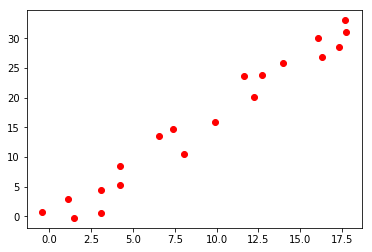

In [8]:
x = np.array([-0.40033681,  1.12710083,  1.51535892,  3.13012734,  3.07744676,
        4.25275393,  6.535855  ,  4.23343874,  8.048823  ,  7.38773014,
        9.91933651, 12.69142755, 11.61959316, 12.20667906, 13.98048109,
       16.07602619, 16.31351797, 17.31102756, 17.74511659, 17.66863483])

y = np.array([ 0.7261771 ,  2.86206199, -0.2489528 ,  0.63325248,  4.49244568,
        5.30531409, 13.6101148 ,  8.48395548, 10.42996366, 14.74172737,
       15.88897483, 23.76571743, 23.61602269, 20.17880228, 25.85779471,
       30.11114371, 26.88735809, 28.57977723, 30.99383456, 33.03676545])

plt.scatter(x, y, color='red')
plt.show()

Prepare matrix A of the form

$$A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
... \\
x_n & 1
\end{bmatrix}$$

In [9]:
x_matrix = x.reshape((-1, 1))
ones = np.ones((len(x), 1))
A = np.append(x_matrix, ones, axis=1)
A

array([[-0.40033681,  1.        ],
       [ 1.12710083,  1.        ],
       [ 1.51535892,  1.        ],
       [ 3.13012734,  1.        ],
       [ 3.07744676,  1.        ],
       [ 4.25275393,  1.        ],
       [ 6.535855  ,  1.        ],
       [ 4.23343874,  1.        ],
       [ 8.048823  ,  1.        ],
       [ 7.38773014,  1.        ],
       [ 9.91933651,  1.        ],
       [12.69142755,  1.        ],
       [11.61959316,  1.        ],
       [12.20667906,  1.        ],
       [13.98048109,  1.        ],
       [16.07602619,  1.        ],
       [16.31351797,  1.        ],
       [17.31102756,  1.        ],
       [17.74511659,  1.        ],
       [17.66863483,  1.        ]])

Compute the pseudo-inverse

$$(A^T A)^{-1} A^T$$

In [10]:
At = A.T
pseudo_inv = np.linalg.inv(At.dot(A)).dot(At)
pseudo_inv

array([[-0.01354453, -0.01139449, -0.01084797, -0.008575  , -0.00864916,
        -0.00699478, -0.00378106, -0.00702197, -0.00165139, -0.00258195,
         0.00098157,  0.0048836 ,  0.00337487,  0.00420126,  0.00669809,
         0.0096478 ,  0.0099821 ,  0.01138621,  0.01199723,  0.01188958],
       [ 0.17490775,  0.15508006,  0.15004008,  0.12907875,  0.1297626 ,
         0.11450593,  0.08486897,  0.11475666,  0.06522911,  0.07381077,
         0.04094796,  0.00496341,  0.01887691,  0.01125594, -0.0117698 ,
        -0.0389721 , -0.04205498, -0.05500366, -0.06063858, -0.05964577]])

Compute $a$ and $b$ by multiplying the pseudo-inverse times $y$

$$\begin{bmatrix}
a \\
b
\end{bmatrix} = (A^T A)^{-1} A^T y$$

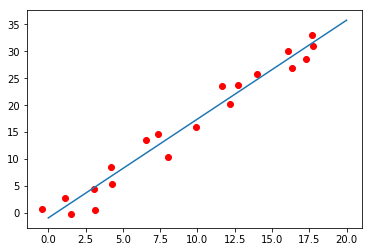

In [11]:
(a, b) = pseudo_inv.dot(y)

x_points = [0, 20]
y_points = [a*x + b for x in x_points]
plt.scatter(x, y, color='red')
plt.plot(x_points, y_points)
plt.show()

## Model Accuracy

The accuracy of the model above can be measured by computing the mean squared error between predicted and training values:

$$ \epsilon = \frac{1}{m} \sum_{i=1}^{m} (a x_i + b - y_i)^2 $$

The prediction error can be computed in the same way, but using the test samples instead of the training samples.

Test error can be different and training error, for example:

- If training error is high, this is a case of __high bias__. This generally means the model is not powerful enough to fit the training data.
- If the training error is low, but the test error is high, this is a case of __high variance__. This usually often means the model is overfitting and does not generalize well with data it has not seen.

In [12]:
epsilon = ((a*x + b - y)**2).mean()
math.sqrt(epsilon)

2.1254120025204726

## Extending the Model

In the case where a straight line will not accurately fit the available data, a more complex model can be used. For example, a quadratic model might be more suitable:

$$ y_i = a {x_i}^2 + b x_i + c \tag{10}$$

In matrix form:

$$ \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix} = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix} \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} \tag{11}$$

In this case the matrix $A$ is:

$$ A = \begin{bmatrix}
{x_1}^2 & x_1 & 1 \\
{x_2}^2 & x_2 & 1 \\
... \\
{x_n}^2 & x_n & 1
\end{bmatrix}\tag{12}$$

The same procedure can be used to find $a$, $b$, and $c$:

$$ \begin{bmatrix}
a \\
b \\
c
\end{bmatrix} = (A^T A)^{-1} A^T y \tag{13}$$